# Mengolah Data Pengiriman

## Importing Library

Pada bagian ini instalasi library yang dibutuhkan untuk mengolah data diantaranya:
1. Pandas
2. Numpy
3. Geolocation
4. Google Maps API

In [71]:
import pandas as pd
import numpy as np
import csv
import datetime
import matplotlib.pyplot as plt

## Read File

In [72]:
data = pd.read_csv("datasample.csv")
print(data)
data.shape

                                               to_address booking_date
0       JL. RAYA PASIR PUTIH NO. 6 RT 05/RW 03 (DEPAN ...     15-12-17
1       LEGENDA WISATA ZONA EINSTEIN BLOK R 12 NO 6 WA...     15-12-17
2       PERM CLUSTER TIDAR ASRI BLOK C7 NO 17 KEL RANG...     15-12-17
3       CIBUNTU SAYURAN RT 12/06 KEL WARUNG MUNCANG BA...     15-12-17
4       JL.CILENGKRANG 1 KOMP TIRTAWENING NO 10 UJUNG ...     15-12-17
...                                                   ...          ...
999928  JL.PARIANOM B4 NO.33 PERUM SOG ATEN MANGUHARJO...     11-12-17
999929  PERUM PESONA BOUGENVILLE C6 J L. JOYO UTOMO V,...     11-12-17
999930  TAMAN ALVERA REGENCY BLOK L-3  MEDOKAN AYU RUN...     11-12-17
999931  H MAYJEND SUTOYO DKT KTR  SAMSAT PAMLET MIE AC...     11-12-17
999932  KP. BABAKAN KOPO RT 03 RW 03 D S. LAMPEGAN KEC...     11-12-17

[999933 rows x 2 columns]


(999933, 2)

## Preprocess Data Set

1. Menghapus baris yang tidak memiliki alamat atau kolom alamat berupa string kosong 

In [117]:
data = data[data.to_address != '  ']
data.isnull().sum()

to_address      0
booking_date    0
bulan           0
dtype: int64

2. Mengubah format kolom booking_data menjadi format datetime

In [74]:
data_pengiriman = pd.DataFrame()
data_pengiriman['booking'] = data['booking_date']
data_pengiriman.index = pd.to_datetime(data_pengiriman['booking'])
data_pengiriman.index

DatetimeIndex(['2017-12-15', '2017-12-15', '2017-12-15', '2017-12-15',
               '2017-12-15', '2017-12-15', '2017-12-15', '2017-12-15',
               '2017-12-15', '2017-12-15',
               ...
               '2017-11-12', '2017-11-12', '2017-11-12', '2017-11-12',
               '2017-11-12', '2017-11-12', '2017-11-12', '2017-11-12',
               '2017-11-12', '2017-11-12'],
              dtype='datetime64[ns]', name='booking', length=999933, freq=None)

In [75]:
import calmap

In [76]:
time_range = pd.date_range(start=data_pengiriman.index[0], end=data_pengiriman.index[-1])
days = data_pengiriman.index
print(days)
events = pd.Series(np.ones(len(days)), index=days)

DatetimeIndex(['2017-12-15', '2017-12-15', '2017-12-15', '2017-12-15',
               '2017-12-15', '2017-12-15', '2017-12-15', '2017-12-15',
               '2017-12-15', '2017-12-15',
               ...
               '2017-11-12', '2017-11-12', '2017-11-12', '2017-11-12',
               '2017-11-12', '2017-11-12', '2017-11-12', '2017-11-12',
               '2017-11-12', '2017-11-12'],
              dtype='datetime64[ns]', name='booking', length=999933, freq=None)


## Mendapatkan Aktivitas Pengiriman

(<Figure size 864x720 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8ECD26160>],
       dtype=object))

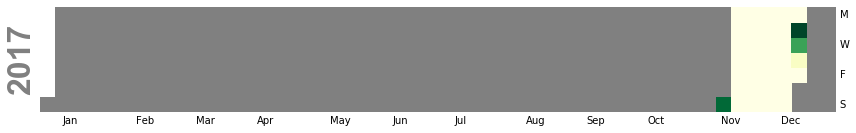

In [77]:
calmap.calendarplot(events, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0,2,4,6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(12, 10)))

Berdasarkan heatmap diatas, dapat disimpulkan bahwa pengiriman terjadi di dua bulan di 2017. Yaitu, bulan November dan bulan Desember. Bila dilihat pada bulan November terjadi pengiriman dengan intensitas tinggi. Sedangkan pada bulan Desember terdapat 2 hari pengiriman, dengan intensitas tinggi.
Jadi, dapat disimpulkan bahwa sebaran pengiriman terpusat pada satu s.d. tiga hari pada setiap bulannya.

### Menghitung Jumlah Pengiriman Setiap Bulan

##### Jumlah Pengiriman Bulan November dan Bulan Desember

In [121]:
pd.to_datetime(data['booking_date'])
#data['bulan'] = data['booking_date'].month
data['bulan'] = data['booking_date']
data['bulan'] = pd.DatetimeIndex(data['booking_date']).month
data.head()
data

,to_address,booking_date,bulan
0,JL. RAYA PASIR PUTIH NO. 6 RT 05/RW 03 (DEPAN ...,15-12-17,12
1,LEGENDA WISATA ZONA EINSTEIN BLOK R 12 NO 6 WA...,15-12-17,12
2,PERM CLUSTER TIDAR ASRI BLOK C7 NO 17 KEL RANG...,15-12-17,12
3,CIBUNTU SAYURAN RT 12/06 KEL WARUNG MUNCANG BA...,15-12-17,12
4,JL.CILENGKRANG 1 KOMP TIRTAWENING NO 10 UJUNG ...,15-12-17,12
...,...,...,...
999928,JL.PARIANOM B4 NO.33 PERUM SOG ATEN MANGUHARJO...,11-12-17,11
999929,"PERUM PESONA BOUGENVILLE C6 J L. JOYO UTOMO V,...",11-12-17,11
999930,TAMAN ALVERA REGENCY BLOK L-3 MEDOKAN AYU RUN...,11-12-17,11
999931,H MAYJEND SUTOYO DKT KTR SAMSAT PAMLET MIE AC...,11-12-17,11


329917
663817


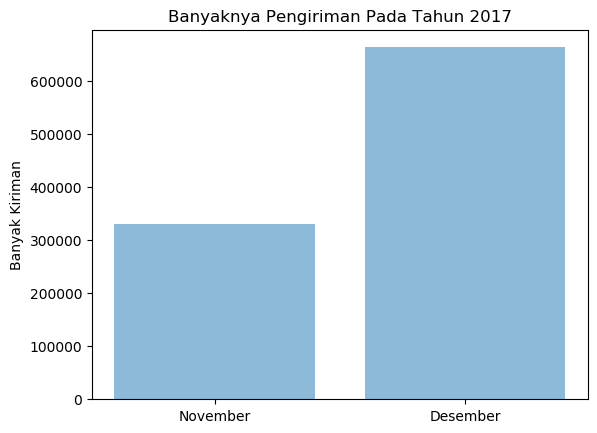

In [139]:
des=len(data[(data['bulan']==12)])
nov=len(data[(data['bulan']==11)])

print(nov)
print(des)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('November', 'Desember')
y_pos = np.arange(len(objects))
performance = [nov, des]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Banyak Kiriman')
plt.title('Banyaknya Pengiriman Pada Tahun 2017')

plt.show()


Dapat disimpulkan berdasarkan diagrama batang diatas, banyaknya booking pengiriman pada bulan desember meningkat dua kali lipat bila dibandingkan dengan bulan november. Hal ini bisa diasumsikan bahwa pada bulan Desember lebih banyak event penjualan seperti natal, midnight sale, dan lain lain. 